# 2025 COMP90042 Project

# 1.Dataset Processing

## a. Data Loading

In [1]:
import pandas as pd

train_df = pd.read_json('data/train-claims.json', orient='index')
dev_df = pd.read_json('data/dev-claims-baseline.json', orient='index')
evidence_df = pd.read_json('data/evidence.json', orient='index')

train_df



,claim_text,claim_label,evidences
claim-1937,Not only is there no scientific evidence that ...,DISPUTED,"[evidence-442946, evidence-1194317, evidence-1..."
claim-126,El Niño drove record highs in global temperatu...,REFUTES,"[evidence-338219, evidence-1127398]"
claim-2510,"In 1946, PDO switched to a cool phase.",SUPPORTS,"[evidence-530063, evidence-984887]"
claim-2021,Weather Channel co-founder John Coleman provid...,DISPUTED,"[evidence-1177431, evidence-782448, evidence-5..."
claim-2449,"""January 2008 capped a 12 month period of glob...",NOT_ENOUGH_INFO,"[evidence-1010750, evidence-91661, evidence-72..."
...,...,...,...
claim-1504,Climate scientists say that aspects of the cas...,SUPPORTS,"[evidence-1055682, evidence-1047356, evidence-..."
claim-243,"In its 5th assessment report in 2013, the IPCC...",SUPPORTS,[evidence-916755]
claim-2302,"Since the mid 1970s, global temperatures have ...",NOT_ENOUGH_INFO,"[evidence-403673, evidence-889933, evidence-11..."
claim-502,But abnormal temperature spikes in February an...,NOT_ENOUGH_INFO,"[evidence-97375, evidence-562427, evidence-521..."


In [2]:
dev_df

,claim_text,claim_label,evidences
claim-752,[South Australia] has the most expensive elect...,NOT_ENOUGH_INFO,"[evidence-67732, evidence-572512, evidence-909..."
claim-375,when 3 per cent of total annual global emissio...,NOT_ENOUGH_INFO,"[evidence-832334, evidence-699212, evidence-10..."
claim-1266,This means that the world is now 1C warmer tha...,SUPPORTS,"[evidence-315434, evidence-198055, evidence-69..."
claim-871,"“As it happens, Zika may also be a good model ...",REFUTES,"[evidence-303245, evidence-88449, evidence-385..."
claim-2164,Greenland has only lost a tiny fraction of its...,DISPUTED,"[evidence-947243, evidence-424102, evidence-91..."
...,...,...,...
claim-2400,"'To suddenly label CO2 as a ""pollutant"" is a d...",SUPPORTS,"[evidence-1022738, evidence-852573, evidence-4..."
claim-204,"after a natural orbitally driven warming, atmo...",REFUTES,"[evidence-30998, evidence-926717, evidence-922..."
claim-1426,Many of the world’s coral reefs are already ba...,SUPPORTS,"[evidence-293637, evidence-305944, evidence-36..."
claim-698,A recent study led by Lawrence Livermore Natio...,REFUTES,"[evidence-519720, evidence-445144, evidence-82..."


In [3]:
evidence_df = evidence_df.rename(columns={0: 'evidence_text'})
evidence_df

,evidence_text
evidence-0,"John Bennet Lawes, English entrepreneur and ag..."
evidence-1,Lindberg began his professional career at the ...
evidence-2,``Boston (Ladies of Cambridge)'' by Vampire We...
evidence-3,"Gerald Francis Goyer (born October 20, 1936) w..."
evidence-4,He detected abnormalities of oxytocinergic fun...
...,...
evidence-1208822,Also on the property is a contributing garage ...
evidence-1208823,| class = ``fn org'' | Fyrde | | | | 6110 | | ...
evidence-1208824,"Dragon Storm (game), a role-playing game and c..."
evidence-1208825,It states that the Zeriuani ``which is so grea...


## b. Data Exploration

### Label Distribution

In [4]:
train_label_counts = train_df['claim_label'].value_counts()
train_label_counts

claim_label
SUPPORTS           519
NOT_ENOUGH_INFO    386
REFUTES            199
DISPUTED           124
Name: count, dtype: int64

In [5]:
dev_label_counts = dev_df['claim_label'].value_counts()
dev_label_counts


claim_label
NOT_ENOUGH_INFO    47
SUPPORTS           41
REFUTES            36
DISPUTED           30
Name: count, dtype: int64

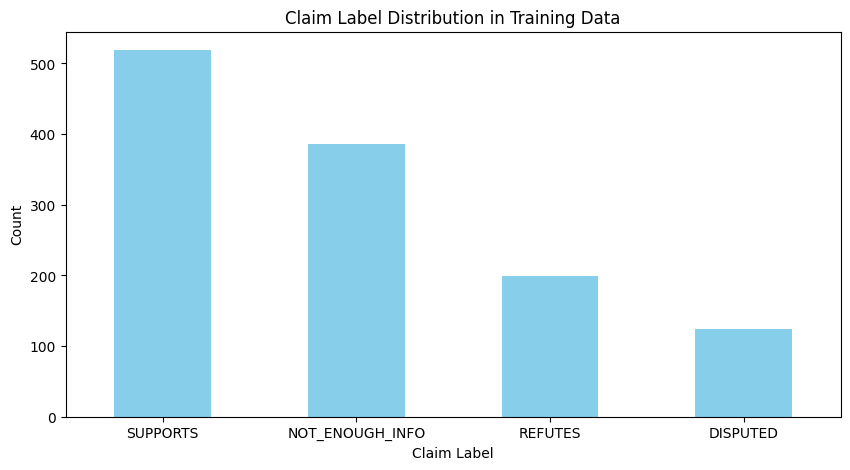

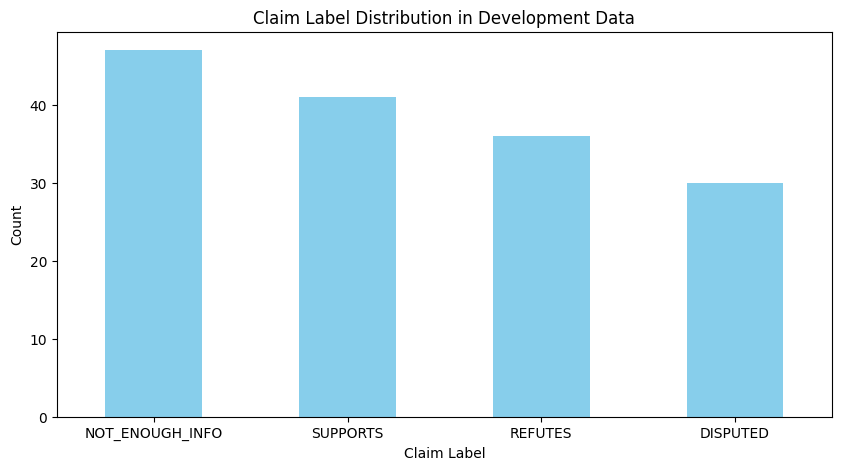

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
train_label_counts.plot(kind='bar', color='skyblue')
plt.title('Claim Label Distribution in Training Data')
plt.xticks(rotation=0)
plt.xlabel('Claim Label')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
dev_label_counts.plot(kind='bar', color='skyblue')
plt.title('Claim Label Distribution in Development Data')
plt.xticks(rotation=0)
plt.xlabel('Claim Label')
plt.ylabel('Count')
plt.show()


The distributions from 2 dataset are quite different, which might cause the higher error metrics when doing evaluation.

### Number of evidence per claim

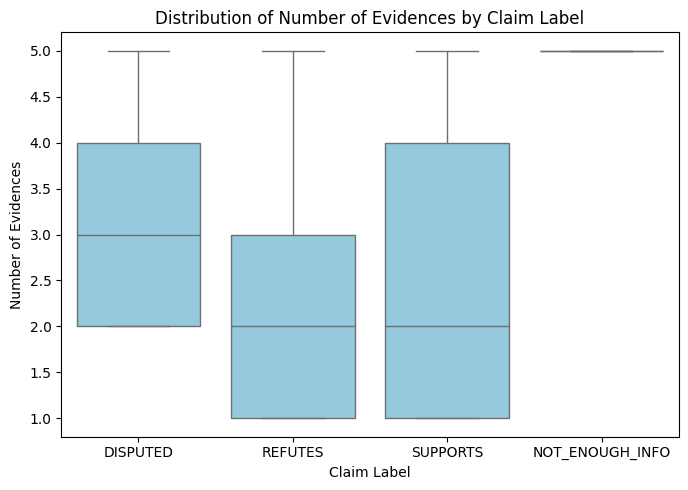

In [7]:
import seaborn as sns

# Count number of evidences for each claim
train_df['num_evidences'] = train_df['evidences'].apply(len)
train_df['num_evidences'].describe()

# Create boxplot
plt.figure(figsize=(7, 5))
sns.boxplot(x='claim_label', y='num_evidences', data=train_df, color='skyblue')
plt.title('Distribution of Number of Evidences by Claim Label')
plt.xlabel('Claim Label')
plt.ylabel('Number of Evidences')
plt.xticks(rotation=0)
plt.tight_layout()


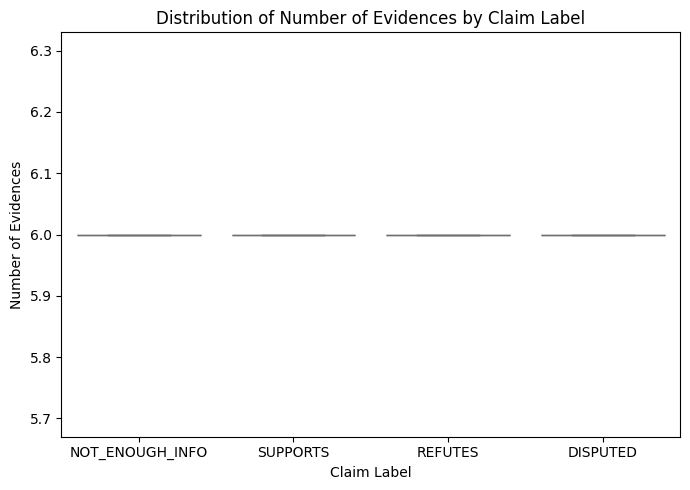

In [8]:
dev_df['num_evidences'] = dev_df['evidences'].apply(len)
dev_df['num_evidences'].describe()

plt.figure(figsize=(7, 5))
sns.boxplot(x='claim_label', y='num_evidences', data=dev_df, color='skyblue')
plt.title('Distribution of Number of Evidences by Claim Label')
plt.xlabel('Claim Label')
plt.ylabel('Number of Evidences')
plt.xticks(rotation=0)
plt.tight_layout()